<a href="https://colab.research.google.com/github/ElahehJafarigol/ML_from_scratch/blob/main/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below is a comprehensive overview of gradient descent—what it is, why we use it, how it works, and the key variations and concepts you’ll encounter in machine learning. Use this as a foundation to understand or explain gradient descent in interviews or in your own work.

---

## 1. What Is Gradient Descent?

**Gradient Descent** is an iterative optimization algorithm used to find a local minimum of a differentiable function (often a *loss* or *cost* function in machine learning). You can think of it as a way to “walk” downhill on the surface defined by your cost function until you (hopefully) reach the lowest point.

- **Goal**: Minimize a cost function $ J(\theta) $, where $ \theta $ represents the parameters (weights) of your model.
- **Approach**: Update $\theta$ in the direction opposite the gradient of $ J(\theta) $ with respect to $\theta$.

Mathematically, for each parameter $\theta_j$:

$
\theta_j \leftarrow \theta_j \;-\; \alpha \;\frac{\partial}{\partial \theta_j} J(\theta)
$

where:
- $\alpha$ is the **learning rate** (a small positive number controlling the size of each step).
- $\frac{\partial}{\partial \theta_j} J(\theta)$ is the **partial derivative** of the cost function with respect to $\theta_j$.

---

## 2. Why Gradient Descent?

1. **Efficiency**: Many cost functions (e.g., in linear regression, logistic regression, or neural networks) are high-dimensional and lack a closed-form solution for the optimal $\theta$. Gradient descent is relatively efficient and widely applicable.
2. **Generality**: Works for complex, non-convex functions (like neural network loss surfaces), unlike some second-order methods (like Newton’s method) which are more expensive or difficult to implement for large-scale problems.
3. **Simplicity**: Easy to implement and reason about—repeatedly move $\theta$ in the direction that reduces the cost function the most rapidly.

---

## 3. Key Ingredients

### 3.1 Cost (Loss) Function

- **Definition**: A function $ J(\theta) $ that measures how far your predictions are from the target values.  
- **Examples**:
  - **Mean Squared Error (MSE)** in linear regression.
  - **Cross-Entropy Loss** in classification tasks.

### 3.2 Learning Rate $\alpha$

- **Definition**: A hyperparameter that controls how big a step you take in the direction opposite the gradient.
- **Trade-off**:
  - **Too large**: The steps might overshoot minima and cause divergence.
  - **Too small**: Convergence is very slow; might get stuck in local minima or saddle points for a long time.

### 3.3 Gradient (Partial Derivatives)

- **Computation**: For each parameter $\theta_j$, you compute $\frac{\partial}{\partial \theta_j} J(\theta)$.
- **Implementation**:
  - For neural networks, this is typically done using **backpropagation** (the chain rule applied to the entire network).
  - For simple linear/logistic regression, there are straightforward analytical partial derivatives.

---

## 4. Types of Gradient Descent

### 4.1 Batch Gradient Descent (BGD)

- **Process**: Uses the **entire training set** to compute the gradient for each update.
- **Pros**:
  - Converges in a smooth, stable manner since you use all data for each gradient calculation.
  - Often used when datasets are not extremely large.
- **Cons**:
  - Can be **very slow** for large datasets because you must process the entire dataset to make a single update.

### 4.2 Stochastic Gradient Descent (SGD)

- **Process**: Updates parameters **for each training example** (or a randomly picked example) at a time.
- **Pros**:
  - Much faster per update because each update is based on one sample.
  - Can escape local minima more easily in non-convex problems due to the noise in each gradient step.
- **Cons**:
  - High variance in the parameter updates; training can be noisy and may oscillate around the minimum rather than fully converge.
  - Typically requires a decreasing learning rate over time or other strategies to ensure convergence.

### 4.3 Mini-Batch Gradient Descent

- **Process**: A hybrid approach—use a **subset (batch) of the training set** (e.g., 32, 64, 128 samples) to compute each gradient.
- **Pros**:
  - More stable updates than pure SGD (less noisy).
  - Faster than batch gradient descent because each update doesn’t need the entire dataset.
  - Effectively uses vectorized operations on batches (well-suited for GPU computations).
- **Cons**:
  - Introduces some hyperparameter tuning around the batch size.

---

## 5. Variants and Improvements

Over the years, many **adaptive or momentum-based** optimizers have been proposed to improve vanilla gradient descent:

1. **Momentum**  
   - Incorporates a fraction of the previous update into the current update (like a ball rolling downhill, picking up speed).  
   - **Update rule** typically looks like:  
     $
     v \leftarrow \beta v + (1 - \beta)\nabla_\theta J(\theta)
     $

     $
     \theta \leftarrow \theta - \alpha v
     $

     where $v$ is the velocity (running average of gradients), and $\beta$ is a momentum coefficient (e.g., 0.9).

2. **Nesterov Accelerated Gradient (NAG)**  
   - A lookahead version of momentum that corrects for velocity overshoot by computing the gradient at a lookahead position.
   - Often speeds up training convergence.

3. **AdaGrad**  
   - Adapts the learning rate to the parameters, performing **larger updates for infrequent parameters** and smaller updates for frequent parameters.
   - Accumulates the square of the gradients in a vector $r$.

4. **RMSProp**  
   - Modifies AdaGrad by using an exponentially decaying average of squared gradients, preventing the learning rate from monotonically decreasing.
   - $
     r \leftarrow \beta r + (1-\beta) (\nabla_\theta J(\theta))^2
     $

     $
     \theta \leftarrow \theta - \frac{\alpha}{\sqrt{r} + \epsilon} \nabla_\theta J(\theta)
     $

5. **Adam (Adaptive Moment Estimation)**  
   - Combines ideas from Momentum and RMSProp.
   - Maintains exponentially decaying averages of past gradients and their squares (first and second moments).
   - Currently one of the most popular optimization algorithms in deep learning.

---

## 6. Convergence and Practical Considerations

1. **Convergence Criteria**:
   - Cost function $ J(\theta) $ changes very little between iterations.
   - Gradient norms become very small.
   - A maximum number of epochs (full passes over the data) is reached.

2. **Learning Rate Scheduling**:
   - **Fixed**: Keep $\alpha$ the same throughout training.
   - **Decay**: Gradually reduce $\alpha$ over time (e.g., exponential decay, step decay).
   - **Adaptive**: Use advanced optimizers (AdaGrad, RMSProp, Adam) that effectively tune the learning rate per parameter.

3. **Local Minima vs. Global Minima**:
   - For **convex** functions (e.g., linear regression MSE), any local minimum is a global minimum.
   - For **non-convex** functions (like neural networks), gradient descent could get stuck in local minima or saddle points, but in practice, neural nets often train to good solutions anyway.

4. **Vanishing and Exploding Gradients**:
   - Common in deep neural networks.
   - **Vanishing**: Gradients get smaller as they backprop through layers, slowing or stopping learning.
   - **Exploding**: Gradients become extremely large, leading to numerical instability.
   - **Solutions**: Proper weight initialization, gradient clipping, better activation functions, or specialized architectures (like LSTM/GRU for sequences).

5. **Initialization**:
   - Good parameter initialization can drastically help or hinder convergence (e.g., Xavier/Glorot initialization, He initialization for deep nets).

---

## 7. Example Pseudocode (Vanilla Mini-Batch Gradient Descent)

Below is a simple outline of how mini-batch gradient descent might look in Python-like pseudocode:

```python
# Pseudocode for mini-batch gradient descent
initialize parameters theta (e.g., randomly)

for epoch in range(1, num_epochs+1):
    shuffle(training_data)
    
    for each batch in training_data:
        X_batch, y_batch = extract_batch(batch)
        
        # 1. Compute predictions & cost
        predictions = model(X_batch, theta)
        cost = cost_function(predictions, y_batch)
        
        # 2. Compute gradients
        gradients = compute_gradients(cost, theta)
        
        # 3. Update parameters
        theta = theta - alpha * gradients
    
    # (Optional) Evaluate cost/accuracy on the full dataset or a validation set
    # (Optional) Adjust learning rate, do early stopping checks, etc.
```

---

## 8. Putting It All Together for Interviews

### Core Points to Emphasize

1. **Conceptual Definition**: Gradient descent is an iterative method to find a local minimum by moving in the direction opposite to the gradient.
2. **Mathematical Form**: $\theta \leftarrow \theta - \alpha \nabla_\theta J(\theta)$.
3. **Learning Rate**: Critical hyperparameter for convergence.
4. **Variants**: Batch, Stochastic, Mini-Batch (and advanced methods like Adam, RMSProp).
5. **Real-World Use**: Essential for training nearly all modern ML models, especially neural networks.

### Typical Interview Questions

- **Explain the difference between batch, stochastic, and mini-batch gradient descent.**  
- **What is the effect of the learning rate on convergence?**  
- **Why might gradient descent get stuck?** (Local minima, saddle points, etc. in non-convex optimization.)  
- **How do advanced optimizers like Adam improve on vanilla gradient descent?**  
- **How do you know you’ve converged or that you need to stop training?**  

Below is a **vanilla gradient descent** implementation in Python for **linear regression**, followed by a **practical use case** with a synthetic dataset. This will help you see how gradient descent can be applied end-to-end.

### Part 1: Vanilla Gradient Descent Implementation

#### 1. Define the Model and Cost Function

We’ll assume a linear model:
$
\hat{y} = X \theta
$
where
- $ X $ is an $(m \times n)$ matrix of training inputs (with $m$ examples and $n$ features).
- $\theta$ is an $(n \times 1)$ vector of parameters.
- $\hat{y}$ is the prediction vector $(m \times 1)$.

For **linear regression**, we often use **Mean Squared Error (MSE)** as the cost (loss) function:
$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m (\hat{y}_i - y_i)^2.
$

#### 2. Compute the Gradient

The gradient of $ J(\theta) $ w.r.t. $\theta$ in matrix form is:
$
\nabla_\theta J(\theta) = \frac{1}{m} X^\top (X\theta - y).
$

#### 3. Update Rule (Vanilla Gradient Descent)

We update $\theta$ iteratively:
$
\theta \leftarrow \theta \;-\; \alpha \;\nabla_\theta J(\theta),
$
where $\alpha$ is the **learning rate**.

#### 4. Python Code

Here is a minimal, fully **vectorized** implementation in Python using NumPy:

In [1]:
import numpy as np

def compute_cost(X, y, theta):
    """
    Computes the Mean Squared Error cost for linear regression:
    J(theta) = (1/(2*m)) * sum((X*theta - y)^2)
    """
    m = len(y)
    predictions = X.dot(theta)               # shape: (m, 1)
    errors = predictions - y.reshape(-1, 1)  # ensure shape (m, 1)
    cost = (1 / (2*m)) * np.sum(errors**2)
    return cost

def compute_gradient(X, y, theta):
    """
    Computes the gradient of the cost function with respect to theta.
    Grad = (1/m) * X^T (X*theta - y)
    """
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y.reshape(-1, 1)
    grad = (1/m) * X.T.dot(errors)  # shape: (n, 1)
    return grad

def gradient_descent(X, y, alpha=0.01, num_iters=100):
    """
    Performs vanilla (batch) gradient descent to learn theta.

    Parameters:
    -----------
    X : numpy array of shape (m, n)
    y : numpy array of shape (m,) or (m, 1)
    alpha : learning rate
    num_iters : number of iterations (epochs)

    Returns:
    --------
    theta : Learned parameters (n, 1)
    cost_history : List of cost values at each iteration
    """
    m, n = X.shape
    theta = np.zeros((n, 1))  # or random initialization
    cost_history = []

    for i in range(num_iters):
        grad = compute_gradient(X, y, theta)
        theta = theta - alpha * grad

        # Optionally track the cost to see convergence
        current_cost = compute_cost(X, y, theta)
        cost_history.append(current_cost)

    return theta, cost_history

### Part 2: A Practical Use Case

Suppose we want to **predict house prices** based on two features:
1. **House size** (square feet)
2. **Number of bedrooms**

Let’s create a **synthetic dataset** and use gradient descent to fit a linear model. We’ll generate data under the assumption that:

$
\text{Price} = 50,000 + 100 \times (\text{sqft}) + 10,000 \times (\text{bedrooms}) + \text{noise}
$

We’ll then see how gradient descent learns the parameters that approximate these relationships.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fix random seed for reproducibility
np.random.seed(42)

m = 200  # number of examples

# Feature 1: House size in '000 sq ft (e.g., 1.2 => 1200 sq ft)
X_size = np.random.rand(m, 1) * 3  # range [0, 3] => up to 3000 sq ft
# Feature 2: Number of bedrooms (1-5)
X_bedrooms = np.random.randint(1, 6, size=(m, 1))

# True parameters
theta_0_true = 50000      # bias (intercept)
theta_size_true = 100     # slope for size
theta_bed_true = 10000    # slope for bedrooms

# Generate noisy labels
noise = np.random.randn(m, 1) * 10000  # some random noise
y_data = (theta_0_true +
          theta_size_true * (X_size * 1000) +
          theta_bed_true * X_bedrooms +
          noise)

# Reshape y_data to be (m, 1) for consistency
y_data = y_data.reshape(-1, 1)

# Construct design matrix X with a column of 1s for the intercept
# so final shape will be (m, 3)
X_data = np.hstack([np.ones((m, 1)), X_size * 1000, X_bedrooms])

print("X_data shape:", X_data.shape)
print("y_data shape:", y_data.shape)

X_data shape: (200, 3)
y_data shape: (200, 1)


We have:
- **m = 200** examples.
- **X_data** has 3 columns:  
  1. All 1s (for intercept).  
  2. House size in square feet (0 to ~3000).  
  3. Number of bedrooms (1 to 5).


#### 2. Apply Gradient Descent

Let’s train our linear regression model using the vanilla gradient descent function defined above:

In [7]:
alpha = 1e-8     # learning rate (small, since our features can be large)
num_iters = 2000

theta_learned, cost_history = gradient_descent(X_data, y_data, alpha, num_iters)

print("Learned theta:")
print(theta_learned.flatten())

print("Final cost:", round(cost_history[-1], 3))

Learned theta:
[  0.53082517 139.63670941   2.12184138]
Final cost: 1130179514.056


#### Choosing a Learning Rate
- We used **1e-8** as the learning rate because the **house size** values are in the thousands, and the price is in the tens or hundreds of thousands. A higher learning rate might cause divergence in this scale.

#### 3. Evaluating the Results

- **Check final parameters**: Compare `theta_learned` to the *true* parameters `(theta_0_true, theta_size_true, theta_bed_true)`.
- **Plot the cost vs. iterations** to confirm if it’s converging:

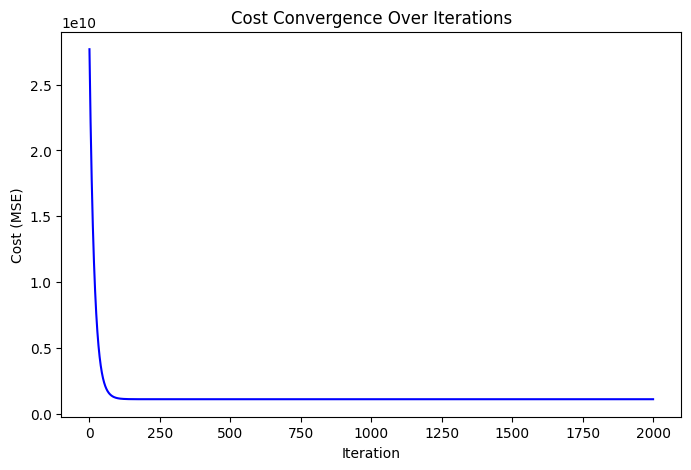

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(range(num_iters), cost_history, 'b-')
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.title("Cost Convergence Over Iterations")
plt.show()

If the cost decreases smoothly and stabilizes, gradient descent is converging properly.

#### 4. Making Predictions

After training, we can make predictions for a new house (e.g., 2000 sq ft, 3 bedrooms):

In [5]:
# Example prediction
test_house = np.array([1, 2000, 3]).reshape(1, -1)  # 1 => intercept
predicted_price = test_house.dot(theta_learned)
print("Predicted Price for 2000 sq ft, 3 br:", predicted_price.item())

Predicted Price for 2000 sq ft, 3 br: 279280.3151780174


# Adam Optimizer
Below is a detailed explanation of the **Adam optimizer**—what it does, how it works, and why it’s widely used in practice. Adam is short for **Adaptive Moment Estimation**, and it combines concepts from **Momentum** and **RMSProp** to adaptively tune the learning rate for each parameter.

---

## 1. Overview

### What is Adam?
- **Adam** is an iterative optimization algorithm typically used to train deep neural networks.
- It **maintains**:
  1. A running average of **first moments** of gradients (similar to momentum).
  2. A running average of **second moments** of gradients (similar to RMSProp).
- These running averages help Adam **adapt the learning rate** for each parameter individually.

### Why Use Adam?
1. **Fast Convergence**: Adam often converges faster than vanilla stochastic gradient descent (SGD) or simple momentum methods.
2. **Robust to Noisy Gradients**: The second moment accumulation (variance estimate) helps dampen updates that are too large.
3. **Less Hyperparameter Tuning**: Default hyperparameters (e.g., $\beta_1=0.9$, $\beta_2=0.999$, $\epsilon=10^{-8}\$ work well for a wide range of problems.

---

## 2. Mathematical Formulation

Let $ \theta $ represent your model parameters (weights). At each time step $ t $:
1. **Compute the gradient** of the loss function $ J(\theta) $ w.r.t. $ \theta $:  
   $
   g_t = \nabla_\theta J(\theta_t)
   $

2. **Update biased first moment estimate** (exponential moving average of the gradients):  
   $
   m_t = \beta_1 \, m_{t-1} + (1 - \beta_1)\, g_t
   $
   - $ m_t $ is the first moment (mean of the gradient).  
   - $ \beta_1 $ (often 0.9) controls the *momentum* or how much past gradients matter.

3. **Update biased second moment estimate** (exponential moving average of the squared gradients):  
   $
   v_t = \beta_2 \, v_{t-1} + (1 - \beta_2)\, g_t^2
   $
   - $ v_t $ is the second moment (uncentered variance of the gradient).
   - $ \beta_2 $) (often 0.999) controls how quickly you forget past gradient magnitudes.

4. **Bias-corrected estimates**  
   Since $ m_t $ and $ v_t $ are **initialized as 0** and are thus biased towards zero, Adam includes correction terms:
   $
   \hat{m}_t = \frac{m_t}{1 - \beta_1^t}
   \quad,\quad
   \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
   $
   This step normalizes for the fact that the moving averages start at zero before they have accumulated enough data.

5. **Update parameters**  
   Finally, Adam updates the parameters by scaling the gradient with the ratio of the first moment to the square root of the second moment (plus a small $\epsilon$ to avoid division by zero):
   $
   \theta_{t+1} = \theta_t - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
   $
   - $ \alpha $ is the **learning rate** (default often $10^{-3}$).  
   - $ \epsilon $ is a small constant (e.g., $10^{-8}$) that prevents division by zero.

---

## 3. Hyperparameters

1. **$\alpha$ (Learning Rate)**  
   - Typical default: $10^{-3}$.  
   - Sometimes lowered for very sensitive tasks (like $10^{-4}$) or increased if training is too slow (like $10^{-2}$).

2. **$\beta_1$**  
   - Controls the exponential decay rate for the first moment.  
   - Default $= 0.9$.  
   - A higher $\beta_1$ means more “momentum” from past gradients.

3. **$\beta_2$**  
   - Controls the exponential decay rate for the second moment.  
   - Default $= 0.999$.  
   - A higher $\beta_2$ means smoother (less noisy) estimates of gradient variance but slower adaptation.

4. **$\epsilon$**  
   - A small constant to prevent division by zero (e.g., $10^{-8}$).  
   - Usually doesn’t need changing, but can matter if the loss scale is unusual.

These defaults often “just work” for many problems, which is one reason Adam is so popular.

---

## 4. Connection to Momentum and RMSProp

1. **Momentum**  
   - Maintains a velocity vector in parameter space, smoothing out gradient updates over time.  
   - Adam’s **first moment** estimate ($ m_t $) is essentially momentum.

2. **RMSProp**  
   - Keeps an exponentially decaying average of squared gradients.  
   - Adam’s **second moment** estimate ($ v_t $) is basically an RMSProp variant.

3. **Adam** is best of both worlds:  
   - Momentum (stabilizes direction of updates)  
   - RMSProp (adapts learning rate to history of gradient magnitudes)

---

## 5. Practical Tips

1. **Default Hyperparameters**  
   - Start with $\alpha = 10^{-3}$, $\beta_1=0.9$, $\beta_2=0.999$, $\epsilon=10^{-8}$.  
   - Adjust only if your loss does not decrease or if you see erratic training behavior.

2. **Learning Rate Schedules**  
   - Even with Adam, you can still **decay the learning rate** over epochs (e.g., reduce $\alpha$ by 0.1 after certain epochs or use a scheduler like **Exponential Decay**, **Step Decay**, etc.).

3. **Weight Decay / Regularization**  
   - Adding weight decay (L2 regularization) can help generalization.  
   - Some frameworks have a separate parameter for weight decay. Alternatively, you can manually add an L2 penalty to the gradient.

4. **Warm Restarts** (Adam Restarts / SGDR)  
   - Sometimes a cyclical or restart-based schedule can help escape local minima or saddle points in deep neural network training.

5. **A Note on $\beta_1 \approx 1.0$**  
   - If $\beta_1$ is set very close to 1, the bias-corrected moment estimate could become large early on, causing instability. Usually 0.9 or 0.95 is a good balance.

---

## 6. Example Pseudocode

Below is simplified pseudocode to illustrate one iteration of Adam:

```python
# Suppose we have parameters theta, gradients g_t at time t
# And we keep track of:
#   m, v (initially 0)
#   beta1, beta2, alpha (lr), epsilon

t = t + 1  # increment timestep

# Update biased first moment estimate
m = beta1 * m + (1 - beta1) * g_t

# Update biased second moment estimate
v = beta2 * v + (1 - beta2) * (g_t ** 2)

# Compute bias-corrected estimates
m_hat = m / (1 - beta1**t)
v_hat = v / (1 - beta2**t)

# Update parameters
theta = theta - alpha * m_hat / (sqrt(v_hat) + epsilon)
```

In real-world code (TensorFlow, PyTorch, etc.), this update logic is handled by the optimizer class once you specify your chosen hyperparameters.

---

## 7. Advantages and Disadvantages

### Advantages
1. **Adaptive Learning Rates**: Different parameters can have different effective learning rates, handling sparse gradients better.
2. **Fast Convergence**: Often outperforms simpler methods like SGD with momentum in early training.
3. **Easy to Use**: The default hyperparameters work well for many problems.

### Disadvantages
1. **Generalization**: Some research suggests Adam solutions may generalize less robustly than vanilla SGD, especially in certain tasks.  
2. **Can Get Stuck**: Like any optimizer, it can stall if poorly tuned or if $\beta_1$, $\beta_2$, or $\alpha$ are chosen badly.  
3. **Over-Reliance on Defaults**: While they often work, sometimes careful tuning is still necessary for best results (especially on large or unusual models).

---

## 8. Summary

Adam is a **first-order gradient-based** optimization algorithm that uses estimates of **first** and **second moments** of the gradients to adapt each parameter’s learning rate during training. In practice, it’s one of the most popular optimizers due to its:

- **Efficiency** in high-dimensional spaces (common in deep learning).  
- **Robustness** to noisy or sparse gradients.  
- **Relatively minimal hyperparameter tuning** requirements (compared to other methods).

**Key Points**:

- **Update Rule**:  
  $
    m_t = \beta_1 m_{t-1} + (1 - \beta_1)g_t, \quad
    v_t = \beta_2 v_{t-1} + (1 - \beta_2)g_t^2
  $  
  $
    \hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad
    \hat{v}_t = \frac{v_t}{1 - \beta_2^t}, \quad
    \theta_{t+1} = \theta_t - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
  $
- **Default Settings** often work well: $\alpha = 10^{-3}$, $\beta_1=0.9$, $\beta_2=0.999$, $\epsilon=10^{-8}$.

By understanding these details, you can **tune** or **diagnose** Adam more effectively in your own machine learning or deep learning projects.